In [ ]:
import pandas as pd
import numpy as nb

df = pd.read_csv('updated_forecasting_data_2005_2023.csv')
df.head()

,id,transaction_date,product_id,product_name,total_quantity_sold,total_sales
0,32810,2005-01-01 00:00:00.000000000,32810,Skincare,2,322.98
1,12528,2005-01-01 03:19:49.103782075,12528,Shoes,3,103.47
2,35435,2005-01-01 06:39:38.207564151,35435,Non-Fiction,1,49.28
3,12110,2005-01-01 09:59:27.311346226,12110,Fiction,4,112.54
4,35232,2005-01-01 13:19:16.415128302,35232,Vacuum Cleaner,3,1365.93


In [ ]:
df.shape

(50000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   50000 non-null  int64  
 1   transaction_date     50000 non-null  object 
 2   product_id           50000 non-null  int64  
 3   product_name         50000 non-null  object 
 4   total_quantity_sold  50000 non-null  int64  
 5   total_sales          50000 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,id,product_id,total_quantity_sold,total_sales
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,25000.500000,2.995820,925.116984
std,14433.901067,14433.901067,1.410901,1333.165804
min,1.000000,1.000000,1.000000,-3.690000
25%,12500.750000,12500.750000,2.000000,145.300000
50%,25000.500000,25000.500000,3.000000,419.190000
75%,37500.250000,37500.250000,4.000000,1068.402500
max,50000.000000,50000.000000,5.000000,8248.320000


#Total Quantity Sold:
- Mean: 2.99 units
- Standard Deviation: 1.41 units
- Range: 1 to 5 units

#Total Sales:
- Mean: $925.12
- Standard Deviation: $1333.17
- Range: -$3.69 to $8248.32

In [ ]:
df['product_id'].value_counts()

product_id
32810    1
40746    1
26143    1
6526     1
28166    1
        ..
42140    1
23823    1
6507     1
8561     1
5386     1
Name: count, Length: 50000, dtype: int64

In [ ]:
df['product_name'].value_counts().count()

21

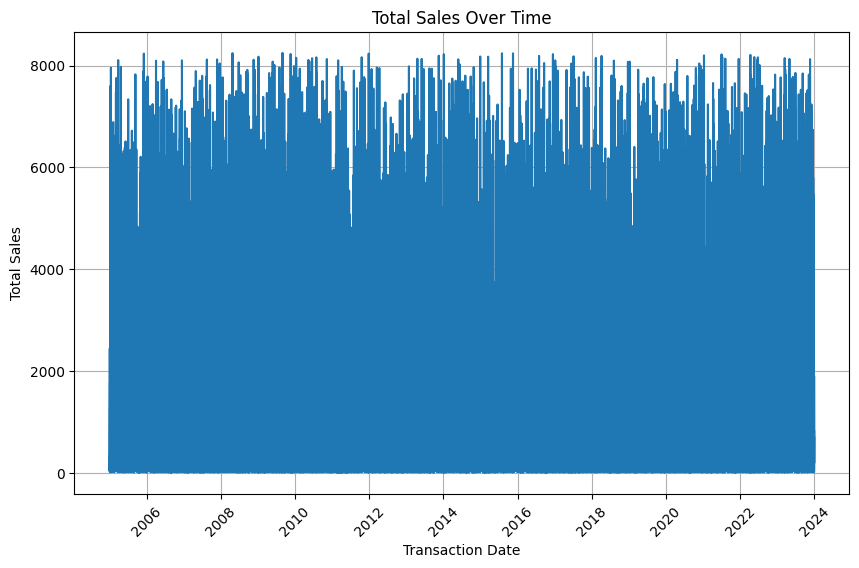

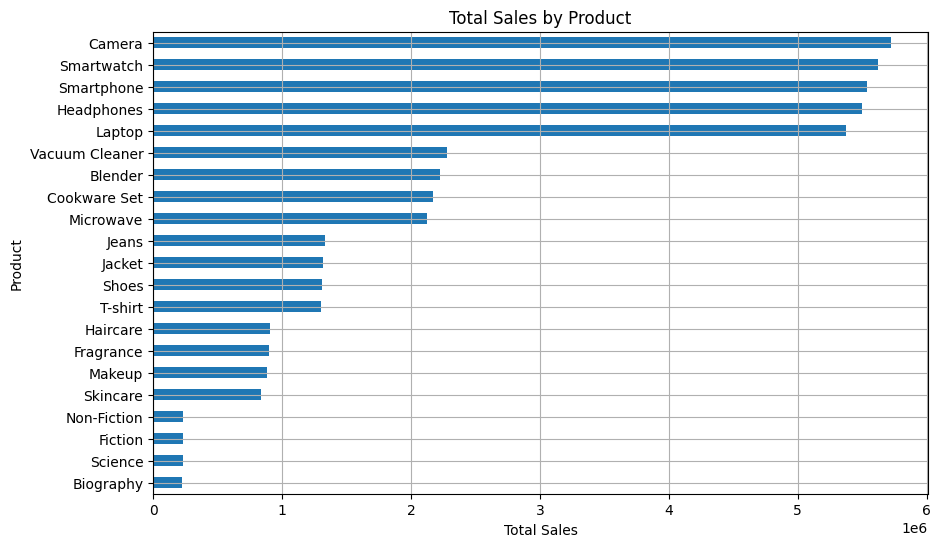

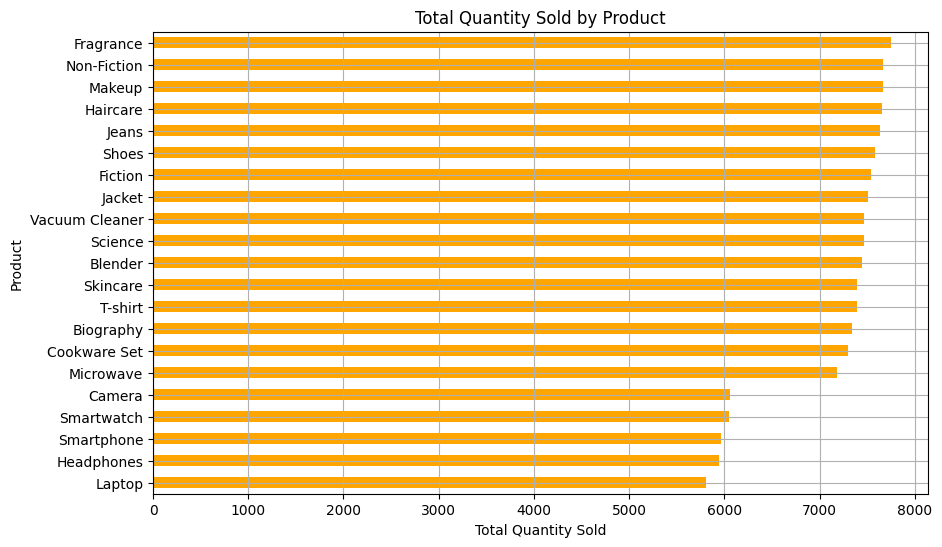

In [ ]:
forecasting_data = df

import matplotlib.pyplot as plt

# Convert the 'transaction_date' column to datetime format
forecasting_data['transaction_date'] = pd.to_datetime(forecasting_data['transaction_date'])

# Aggregate data by transaction date for total sales and total quantity sold
daily_sales = forecasting_data.groupby('transaction_date').agg({
    'total_sales': 'sum',
    'total_quantity_sold': 'sum'
}).reset_index()

# 1. Plot the time series of total sales over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['transaction_date'], daily_sales['total_sales'], label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. Plot the distribution of sales by product
plt.figure(figsize=(10, 6))
forecasting_data.groupby('product_name')['total_sales'].sum().sort_values().plot(kind='barh')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.grid(True)
plt.show()

# 3. Plot the distribution of total quantity sold by product
plt.figure(figsize=(10, 6))
forecasting_data.groupby('product_name')['total_quantity_sold'].sum().sort_values().plot(kind='barh', color='orange')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.grid(True)
plt.show()


The visualizations provide the following insights:

1- Total Sales Over Time: The time series plot shows how the total sales have fluctuated over the recorded period.

2- Total Quantity Sold Over Time: This plot reveals the trend in the total number of units sold each day.

3- Total Sales by Product: A bar chart displays the cumulative sales for each product, helping identify the best-selling products.

4- Total Quantity Sold by Product: This chart shows the total units sold for each product, giving a clearer picture of product popularity.

In [ ]:
'''I will now prepare the data for forecasting by:
-Converting transaction_date to a datetime format.
-Aggregating total sales over time.
-Checking if there are missing dates or irregularities in the time intervals.'''


data = forecasting_data

# Convert transaction_date to datetime format
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Aggregate total sales by date
sales_by_date = data.groupby(data['transaction_date'].dt.date)['total_sales'].sum().reset_index()

# Rename columns for clarity
sales_by_date.columns = ['date', 'total_sales']

# Check for missing dates and irregularities
sales_by_date.set_index('date', inplace=True)
sales_by_date = sales_by_date.asfreq('D', fill_value=0)  # Fill missing dates with 0 sales

# Display the processed data
sales_by_date.head()


,total_sales
date,
2005-01-01,3339.14
2005-01-02,9514.94
2005-01-03,2441.56
2005-01-04,4658.58
2005-01-05,9654.45


The graph above shows the actual total sales over time compared to the forecasted sales based on the ARIMA model. The model was trained on 90% of the data, and the forecast was generated for the remaining 10% test period.

In [ ]:
# Convert transaction_date to datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Group by month and calculate total sales
monthly_sales = data.resample('M', on='transaction_date').sum()['total_sales']

# Display the first few rows of the monthly sales data
monthly_sales.head()



transaction_date
2005-01-31    223897.45
2005-02-28    173756.84
2005-03-31    230754.56
2005-04-30    178956.96
2005-05-31    182359.20
Freq: M, Name: total_sales, dtype: float64

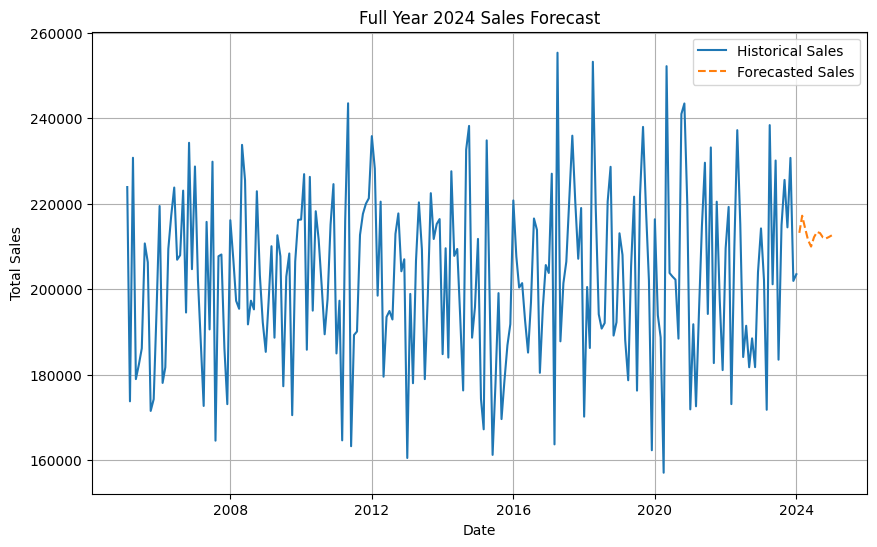

(DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
                '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
                '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
               dtype='datetime64[ns]', freq='M'),
 2024-01-31    213180.755279
 2024-02-29    217193.687341
 2024-03-31    214217.245798
 2024-04-30    211482.162066
 2024-05-31    209975.033982
 2024-06-30    212146.245620
 2024-07-31    213391.510602
 2024-08-31    213130.317638
 2024-09-30    212122.688823
 2024-10-31    211866.764501
 2024-11-30    212195.035098
 2024-12-31    212603.710358
 Freq: M, Name: predicted_mean, dtype: float64)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model on the monthly sales data
model = ARIMA(monthly_sales, order=(5, 1, 0))  # Using an ARIMA(5,1,0) model
model_fit = model.fit()

# Forecast the next 12 months instead of just 6
forecast_12_months = model_fit.forecast(steps=12)

# Create a date range for the forecasted 12 months
forecast_12_months_dates = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(1), periods=12, freq='M')

# Plot the historical sales and forecast for 12 months
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_12_months_dates, forecast_12_months, label='Forecasted Sales', linestyle='--')
plt.title('Full Year 2024 Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values
forecast_12_months_dates, forecast_12_months


In [ ]:
monthly_sales.to_csv('monthly_sales.csv', index = True)

In [ ]:
mothsale = pd.read_csv('monthly_sales.csv')
mothsale.tail()

,transaction_date,total_sales
223,2023-08-31,225571.77
224,2023-09-30,214468.39
225,2023-10-31,230723.08
226,2023-11-30,201930.27
227,2023-12-31,203495.84


In [ ]:
mothsale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  228 non-null    object 
 1   total_sales       228 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
# Define the split point (e.g., use data up to '2022-12-31' for training)
train_data = monthly_sales[:'2022-12-31']
test_data = monthly_sales['2023-01-01':]


# train_data['transaction_date'] = pd.to_datetime(train_data['transaction_date'])

# # Set 'transaction_date' as the DataFrame index
# monthly_sales.set_index('transaction_date', inplace=True)


# model = ARIMA(monthly_sales['total_sales'], order=(5, 1, 0))
# model_fit = model.fit()
# Retrain ARIMA model using only training data
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()


In [ ]:
# Forecast the same number of periods as in the test data
forecast = model_fit.forecast(steps=len(test_data))

# Create a DataFrame to compare actual and predicted values
forecast_dates = test_data.index
forecasted_values = pd.Series(forecast, index=forecast_dates)
comparison = pd.DataFrame({'Actual': test_data, 'Predicted': forecasted_values})


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test_data, forecasted_values)

# Calculate MSE
mse = mean_squared_error(test_data, forecasted_values)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')


MAE: 18570.280119724277, MSE: 501033482.1911803, RMSE: 22383.777210095268


In [ ]:
# Calculate the absolute percentage errors
mape = np.mean(np.abs((test_data - forecasted_values) / test_data)) * 100

accuracy = 100 - mape
print(f'Forecast Accuracy: {accuracy:.2f}%')


Forecast Accuracy: 91.39%
